### 4.HMM实践

我们使用hmmlearn实践一下。详细参见[官方文档](https://hmmlearn.readthedocs.io/en/latest/)：https://hmmlearn.readthedocs.io/en/latest/

hmmlearn实现了三种HMM模型类，按照观测状态是连续状态还是离散状态，可以分为两类。GaussianHMM和GMMHMM是连续观测状态的HMM模型，而MultinomialHMM是离散观测状态的模型，也是我们在HMM原理系列篇里面使用的模型。

以下是使用HMM进行采样的例子

C:\Users\23361\AppData\Local\Temp/ipykernel_13432/3509860873.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


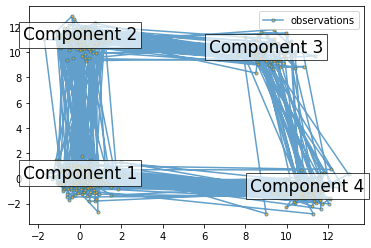

In [7]:
#pip install hmmlearn

import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0, 0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
gen_model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
gen_model.startprob_ = startprob
gen_model.transmat_ = transmat
gen_model.means_ = means
gen_model.covars_ = covars

# Generate samples
X, Z = gen_model.sample(500)

# Plot the sampled data
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
        mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    ax.text(m[0], m[1], 'Component %i' % (i + 1),
            size=17, horizontalalignment='center',
            bbox=dict(alpha=.7, facecolor='w'))
ax.legend(loc='best')
fig.show()

In [8]:
scores = list()
models = list()
for n_components in (3, 4, 5):
    # define our hidden Markov model
    model = hmm.GaussianHMM(n_components=n_components,
                            covariance_type='full', n_iter=10)
    model.fit(X[:X.shape[0] // 2])  # 50/50 train/validate
    models.append(model)
    scores.append(model.score(X[X.shape[0] // 2:]))
    print(f'Converged: {model.monitor_.converged}'
          f'\tScore: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
      'states')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model.predict(X)

Converged: True	Score: -1065.5259488089373
Converged: True	Score: -904.2908933008515
Converged: True	Score: -905.5449538166446
The best model had a score of -904.2908933008515 and 4 states


C:\Users\23361\AppData\Local\Temp/ipykernel_13432/3700403680.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\23361\AppData\Local\Temp/ipykernel_13432/3700403680.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


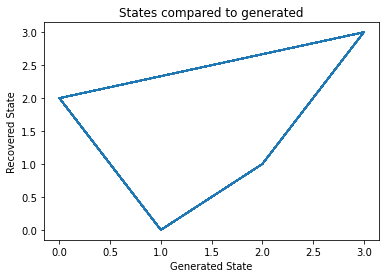

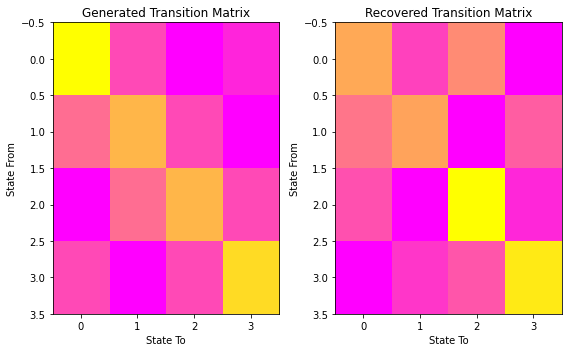

In [10]:
#让我们将我们的状态与生成的状态和我们的转换矩阵进行比较，来看我们的模型
# plot model states over time
fig, ax = plt.subplots()
ax.plot(Z, states)
ax.set_title('States compared to generated')
ax.set_xlabel('Generated State')
ax.set_ylabel('Recovered State')
fig.show()

# plot the transition matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ax1.imshow(gen_model.transmat_, aspect='auto', cmap='spring')
ax1.set_title('Generated Transition Matrix')
ax2.imshow(model.transmat_, aspect='auto', cmap='spring')
ax2.set_title('Recovered Transition Matrix')
for ax in (ax1, ax2):
    ax.set_xlabel('State To')
    ax.set_ylabel('State From')

fig.tight_layout()
fig.show()